# Recommender Project

## 1. Import Restaurant Ratings Table and Check for Data Quality Issues

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [348]:
restaurant_ratings = pd.read_excel(
    "/Users/huzaifamalik/Downloads/Python for Data Science/Unsupervised Learning/Data/Restaurant_Ratings.xlsx",
    sheet_name=0
)

In [349]:
restaurant_ratings.shape

(1161, 4)

In [350]:
restaurant_ratings.head()

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1


In [351]:
restaurant_ratings.dtypes

Consumer_ID        object
Restaurant_ID       int64
Restaurant_Name    object
Overall_Rating      int64
dtype: object

In [352]:
#Check for any duplicates

restaurant_ratings.loc[restaurant_ratings.duplicated()]

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating


In [353]:
#Check for any missing values

restaurant_ratings.loc[restaurant_ratings.isna().any(axis = 1)]

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating


In [354]:
#Check for any typos or errors in object data type columns

for col in restaurant_ratings.select_dtypes("object").columns:
    
    print(restaurant_ratings[col].value_counts().sort_index())
    print("\n")

Consumer_ID
U1001     9
U1002    10
U1003    13
U1004     8
U1005     9
         ..
U1134    16
U1135    14
U1136    10
U1137    14
U1138     3
Name: count, Length: 138, dtype: int64


Restaurant_Name
Abondance Restaurante Bar         12
Arrachela Grill                    3
Cabana Huasteca                   13
Cafe Ambar                         4
Cafe Chaires                      15
                                  ..
Tortas Hawaii                      3
Tortas Locas Hipocampo            36
Tortas Y Hamburguesas El Gordo     5
Unicol's Pizza                    14
Vips                              24
Name: count, Length: 127, dtype: int64




In [355]:
#Strip any unnecessary leading and trailer spaces for object data type columns

for col in restaurant_ratings.select_dtypes("object").columns:
    restaurant_ratings[col] = restaurant_ratings[col].str.strip()

In [356]:
#Check for any outliers in Rating column

restaurant_ratings["Overall_Rating"].value_counts().sort_index()

Overall_Rating
0    254
1    421
2    486
Name: count, dtype: int64

## 2. Import Restaurant Details Table and Check for Data Quality Issues

In [373]:
restaurant_details = pd.read_excel(
    "/Users/huzaifamalik/Downloads/Python for Data Science/Unsupervised Learning/Data/Restaurant_Ratings.xlsx",
    sheet_name=1
)

In [374]:
restaurant_details.shape

(127, 5)

In [375]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [376]:
restaurant_details.dtypes

Restaurant_ID    float64
Name              object
Cuisine           object
Price             object
Franchise         object
dtype: object

In [377]:
#Check how many rows/restaurants have missing in Restaurant ID 

restaurant_details.loc[restaurant_details["Restaurant_ID"].isna()]

,Restaurant_ID,Name,Cuisine,Price,Franchise
13,NaN,Cenaduria El Rinc√≥n De Tlaquepaque,NaN,NaN,NaN
30,NaN,El Rinc√≥n De San Francisco,NaN,NaN,NaN
36,NaN,Gorditas Do√±a Tota,NaN,NaN,NaN
80,NaN,Restaurant Las Ma√±anitas,NaN,NaN,NaN


In [378]:
#Check for more missing values in entire table

print(restaurant_details.loc[restaurant_details.isna().any(axis = 1)].shape)
print("\n")
restaurant_details.loc[restaurant_details.isna().any(axis = 1)].head()

(37, 5)




,Restaurant_ID,Name,Cuisine,Price,Franchise
1,135016.0,Arrachela Grill,NaN,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
10,132654.0,Carnitas Mata Calle 16 de Septiembre,NaN,Low,No
11,132660.0,Carnitas Mata Calle Emilio Portes Gil,NaN,Low,No
13,NaN,Cenaduria El Rinc√≥n De Tlaquepaque,NaN,NaN,NaN


In [379]:
#Check for inconsistencies or typos in object data type columns

for col in restaurant_details.iloc[:,2:].columns:
    print(restaurant_details[col].value_counts(dropna=False).sort_index())
    print("\n")

Cuisine
American          5
Armenian          1
Bakery            1
Bar              13
Breakfast         1
Brewery           1
Burgers           4
Cafeteria         6
Chinese           3
Coffee Shop       1
Contemporary      1
Family            2
Fast Food         6
International     3
Italian           4
Japanese          5
Mexican          23
Pizzeria          3
Regional          1
Seafood           5
Vietnamese        1
NaN              37
Name: count, dtype: int64


Price
High      24
Low       45
Medium    54
NaN        4
Name: count, dtype: int64


Franchise
No     96
Yes    27
NaN     4
Name: count, dtype: int64




In [380]:
#Strip any unnecessary leading and trailer spaces for object data type columns

for col in restaurant_details.select_dtypes("object").columns:
    restaurant_details[col] = restaurant_details[col].str.strip()

## 3. Collaborative Filtering: Recommend Restaurants to a New User

In [381]:
#Calculate mean rating of all restaurants

restaurant_ratings["Overall_Rating"].mean()

np.float64(1.1998277347114557)

In [382]:
#Avg rating of restaurant is 1.1998277347114557 so I am going to fill all na/empty values with 1.199828 rating
#This is the Assumption

X = restaurant_ratings.pivot_table(
    index = "Consumer_ID",
    columns="Restaurant_Name",
    values = "Overall_Rating",
    aggfunc="mean"
).fillna(1.199828)

X.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,0.000000,1.199828,1.199828,1.199828
U1002,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.000000,1.199828,1.199828,1.199828
U1003,1.199828,1.199828,2.000000,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1004,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828
U1005,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,2.000000,1.199828,1.199828,...,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828,1.199828


In [383]:
X.mean()

Restaurant_Name
Abondance Restaurante Bar         1.138973
Arrachela Grill                   1.195484
Cabana Huasteca                   1.224482
Cafe Ambar                        1.186790
Cafe Chaires                      1.178108
                                    ...   
Tortas Hawaii                     1.202730
Tortas Locas Hipocampo            1.234655
Tortas Y Hamburguesas El Gordo    1.178095
Unicol's Pizza                    1.165063
Vips                              1.179568
Length: 127, dtype: float64

In [384]:
#Center the data

X_centered = X - X.mean()
X_centered.head()

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-1.234655,0.021733,0.034765,0.02026
U1002,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.234655,0.021733,0.034765,0.02026
U1003,0.060855,0.004344,0.775518,0.013038,0.02172,0.772628,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034827,0.021733,0.034765,0.02026
U1004,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,0.779875,0.033323,-0.002902,-0.034827,0.021733,0.034765,0.02026
U1005,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.804485,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034827,0.021733,0.034765,0.02026


In [385]:
#Import TruncatedSVD and use 127 components first since there are 127 restaurants

from sklearn.decomposition import TruncatedSVD

svd127 = TruncatedSVD(n_components=127, random_state=42)

U = pd.DataFrame(svd127.fit_transform(X_centered))

U.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,-0.238987,-0.004732,-0.244227,-0.223318,0.387806,0.198917,0.055890,-0.672026,-0.123742,0.366808,...,-0.002682,0.044866,-0.031612,-0.012164,-0.022619,0.031714,0.002626,0.023897,0.005131,-0.001076
1,0.347358,0.024012,-0.011130,-0.134108,0.224169,-0.099427,-0.020287,0.092353,-0.025185,-0.174413,...,0.009931,-0.045685,0.011798,-0.019839,0.025925,-0.011349,-0.000738,-0.006433,-0.007813,0.000236
2,0.293837,-0.468494,1.377970,0.387374,0.999304,0.293274,0.028629,-0.965113,-0.277183,0.655717,...,0.001804,-0.004534,0.005459,0.005589,0.009876,0.019904,0.000786,0.003100,-0.004856,0.000306
3,0.630330,0.132804,-0.634468,-0.014700,0.124572,-0.020247,0.091441,-0.013164,-0.149594,0.632992,...,-0.006321,0.004020,0.012769,0.022331,-0.000732,-0.011119,-0.000655,-0.006691,-0.002589,0.000431
4,0.355531,0.298323,-0.038962,-0.145842,-0.034525,0.116069,0.094693,0.523970,0.009282,0.688180,...,0.000830,0.010911,-0.015252,-0.040849,0.030631,-0.005658,-0.000265,-0.003136,-0.002396,0.000198


In [386]:
#Find cumulative explained variance ratio with n_components = 127

cum_evr127 = list(zip(range(1,128), np.cumsum(svd127.explained_variance_ratio_)))

cum_evr127_df = pd.DataFrame(cum_evr127).set_index(0)

cum_evr127_df

,1
0,
1,0.097900
2,0.146843
3,0.184737
4,0.220179
5,0.252781
...,...
123,0.999939
124,0.999966
125,0.999989


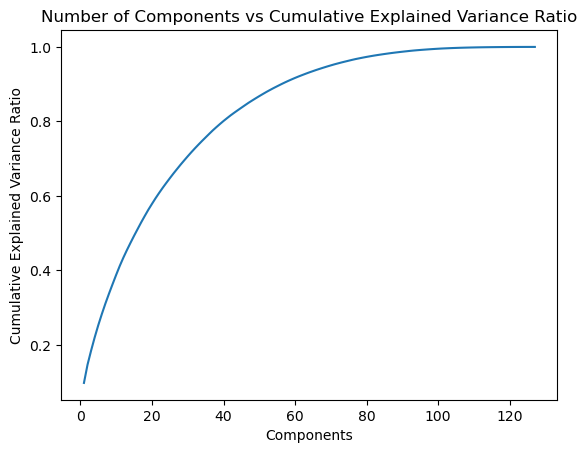

In [387]:
#Plot the cumulative explained variance ratio graph

cum_evr127_df.plot(
    title='Number of Components vs Cumulative Explained Variance Ratio',
    xlabel='Components',
    ylabel='Cumulative Explained Variance Ratio',
    legend=False
);

In [388]:
#Choose n_components to be 50 since it produces cumulative explained variance ratio of greater than 80%

svd50 = TruncatedSVD(n_components=50, random_state=42)

U50 = pd.DataFrame(svd50.fit_transform(X_centered)) 

U50.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.238987,-0.004732,-0.244226,-0.223318,0.387806,0.198917,0.055891,-0.672027,-0.123740,0.366808,...,0.022454,-0.176082,0.114387,0.082491,0.058669,-0.013547,-0.118973,-0.062260,0.072071,-0.074310
1,0.347358,0.024012,-0.011130,-0.134108,0.224168,-0.099429,-0.020288,0.092356,-0.025180,-0.174409,...,-0.279472,-0.244558,-0.119135,0.172026,0.095159,0.034871,-0.143116,0.016324,-0.016434,0.057776
2,0.293837,-0.468494,1.377969,0.387374,0.999304,0.293272,0.028626,-0.965109,-0.277182,0.655722,...,0.097566,0.406983,-0.423664,-0.160171,0.204199,-0.086225,0.246947,0.050471,0.040775,0.012376
3,0.630330,0.132804,-0.634468,-0.014700,0.124573,-0.020245,0.091443,-0.013169,-0.149598,0.632985,...,-0.212481,-0.024544,0.008085,-0.028734,0.137118,-0.117247,-0.310112,-0.046114,-0.099597,-0.048560
4,0.355531,0.298323,-0.038962,-0.145842,-0.034525,0.116068,0.094694,0.523971,0.009287,0.688183,...,-0.095437,-0.165618,0.165855,-0.032630,0.151825,-0.098401,-0.220648,-0.070578,-0.109944,0.035982


In [389]:
# create a vector of NaN values

vector_length = X.shape[1]
new_user = np.full(vector_length, np.nan)

# populate with 2 ratings

ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame

new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [390]:
#Fill na or empty values of new user with mean rating of 1.199828

new_user_fillna_df = new_user_df.fillna(1.199828)

#Center the new user data

new_user_centered_df = new_user_fillna_df - X.mean()

new_user_centered_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.060855,0.004344,-0.024654,0.013038,0.02172,-0.027544,0.008688,0.004313,-0.011603,0.001442,...,0.021733,0.005792,0.004344,-0.020297,0.033323,-0.002902,-0.034827,0.021733,0.034765,0.02026


In [391]:
new_user_50d = pd.DataFrame(svd50.transform(new_user_centered_df))

new_user_50d

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.021157,-0.049697,-0.085407,0.029617,-0.003825,0.028022,0.071138,-0.031721,-0.055159,-0.078404,...,-0.041305,0.069299,0.019999,0.012145,-0.05149,0.02842,-0.011544,-0.01174,-0.073893,0.020729


In [394]:
new_user_recs = pd.DataFrame(np.dot(new_user_50d, svd50.components_), columns=X.columns)

new_user_recs

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.031478,0.003101,-0.021114,0.001254,0.050509,0.003217,-0.046473,-0.004715,-0.006946,0.001946,...,0.015779,0.006801,0.002858,-0.021743,0.022406,0.008551,-0.030884,-0.11428,0.021717,0.089591


In [395]:
new_user_recs_sorted = (
    pd.DataFrame(new_user_recs.iloc[0].values, new_user_recs.iloc[0].index)
    .rename(columns = {0: "Predicted_Ratings"})
    .sort_values("Predicted_Ratings", ascending=False)
)

In [396]:
new_user_recs_sorted.head()

,Predicted_Ratings
Restaurant_Name,
KFC,0.141963
Potzocalli,0.131079
McDonalds Centro,0.123627
Chilis Cuernavaca,0.116479
Restaurant And Bar And Clothesline Carlos N Charlies,0.115744


In [398]:
#Find already rated restaurants by the new user

already_rated = new_user_df.T.reset_index().dropna()

already_rated

,Restaurant_Name,0
40,KFC,2.0
60,McDonalds Centro,2.0


In [399]:
#New user likes low price american chain restaurants

restaurant_details.loc[restaurant_details["Name"].isin(already_rated["Restaurant_Name"])]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


In [400]:
#Exclude the restaurants already rated by the user that are KFC and McDonalds 

top_10_recs = (
    new_user_recs_sorted.loc[~new_user_recs_sorted.index.isin(already_rated["Restaurant_Name"])]
    .reset_index()
    .head(10)
)

top_10_recs

,Restaurant_Name,Predicted_Ratings
0,Potzocalli,0.131079
1,Chilis Cuernavaca,0.116479
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744
3,Restaurante Y Pescaderia Tampico,0.110840
4,Restaurant Teely,0.109476
5,Mariscos Tia Licha,0.104812
6,Vips,0.089591
7,Sirlone,0.075018
8,Chaires,0.060605
9,El Lechon Potosino,0.058373


In [401]:
#Combine predicted ratings and restaurant details tables

#Top 10 restaurant recommendations for this new user who likes KFC and McDonalds

pd.merge(
    top_10_recs,
    restaurant_details,
    left_on = "Restaurant_Name",
    right_on = "Name",
    how = "inner"
).iloc[:, [0,1,4,5,6]]

,Restaurant_Name,Predicted_Ratings,Cuisine,Price,Franchise
0,Potzocalli,0.131079,NaN,Low,No
1,Chilis Cuernavaca,0.116479,NaN,Medium,No
2,Restaurant And Bar And Clothesline Carlos N Ch...,0.115744,Bar,High,No
3,Restaurante Y Pescaderia Tampico,0.110840,Seafood,High,No
4,Restaurant Teely,0.109476,NaN,High,No
5,Mariscos Tia Licha,0.104812,Family,Medium,Yes
6,Vips,0.089591,American,Low,Yes
7,Sirlone,0.075018,International,Medium,No
8,Chaires,0.060605,Bakery,Medium,No
9,El Lechon Potosino,0.058373,International,Low,No


## 4. Content Based Filtering: Suggest Similar Restaurants to a Restaurant

In [417]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [418]:
#Turn Cuisine column into dummy variables

restaurant_details_df = (
    pd.get_dummies(
        restaurant_details.drop(columns = ["Restaurant_ID", "Price", "Franchise"]).set_index("Name"), dtype=int
    )
)

In [421]:
new_columns = []

for col in restaurant_details_df.columns:
    new_columns.append(col[(col.find("_") + 1):])

In [422]:
restaurant_details_df.columns = new_columns

In [423]:
restaurant_details_df.head()

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,Family,Fast Food,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
#Turn Price column into numeric values

restaurant_details_df["Price"] = (
    np.where(
        restaurant_details["Price"] == "High", 1, np.where(restaurant_details["Price"] == "Medium", 0, -1)
    )
)

In [425]:
#Turn Franchise column into an indicator

restaurant_details_df["Franchise"] = (
    np.where(
        restaurant_details["Franchise"] == "Yes", 1, 0
    )
)

In [426]:
restaurant_details_df.head()

,American,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,...,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese,Price,Franchise
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Cafe Chaires,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-1,0


In [209]:
#Calculate cosine similarities between rows

from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(restaurant_details_df)

cosine_df = pd.DataFrame(cosine_matrix, index = restaurant_details_df.index, columns = restaurant_details_df.index)

cosine_df

Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,1.000000,0.408248,0.333333,0.816497,0.666667,0.333333,0.666667,0.333333,0.000000,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333
Arrachela Grill,0.408248,1.000000,0.816497,0.500000,0.408248,0.816497,0.408248,0.816497,0.408248,0.408248,...,0.408248,0.408248,0.408248,0.000000,0.408248,0.816497,0.816497,0.408248,0.408248,0.000000
Cabana Huasteca,0.333333,0.816497,1.000000,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.666667,...,0.666667,0.666667,0.666667,0.000000,0.666667,0.666667,0.666667,0.333333,0.333333,0.000000
Cafe Ambar,0.816497,0.500000,0.408248,1.000000,0.816497,0.408248,0.816497,0.408248,0.000000,0.000000,...,0.816497,0.816497,0.816497,0.408248,0.816497,0.408248,0.408248,0.816497,0.816497,0.408248
Cafe Chaires,0.666667,0.408248,0.333333,0.816497,1.000000,0.666667,1.000000,0.666667,0.000000,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tortas Hawaii,0.333333,0.816497,0.666667,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.000000
Tortas Locas Hipocampo,0.333333,0.816497,0.666667,0.408248,0.333333,0.666667,0.333333,0.666667,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.000000,0.333333,1.000000,1.000000,0.333333,0.333333,0.000000
Tortas Y Hamburguesas El Gordo,0.666667,0.408248,0.333333,0.816497,0.666667,0.333333,0.666667,0.333333,0.333333,0.000000,...,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.333333,1.000000,0.666667,0.333333


In [427]:
#Wrote a function which will return top 10 similar restaurants to a particular restaurant

def recommend_similar_restaurants(restaurant_name):
    similar_restaurants = (
        cosine_df.loc[:, restaurant_name]
        .reset_index()
        .sort_values(restaurant_name, ascending = False)   
    ).query("Name != @restaurant_name").set_index("Name")
    
    return similar_restaurants.head(10)
    

In [438]:
#Find restaurants similar to KFC

kfc_recs = recommend_similar_restaurants("KFC").reset_index()

kfc_recs

,Name,KFC
0,Vips,1.000000
1,Tacos Los Volcanes,1.000000
2,McDonalds Centro,1.000000
3,Church's,0.816497
4,Dairy Queen,0.816497
5,Sirloin Stockade,0.816497
6,Hamburguesas La Perica,0.666667
7,Pollo Frito Buenos Aires,0.666667
8,Emilianos,0.666667
9,Subway,0.666667


In [432]:
#Recall: New user likes low price american chain restaurants

restaurant_details.loc[restaurant_details["Name"].isin(already_rated["Restaurant_Name"])]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


In [439]:
#For the KFC details page, these are the top 10 other restuarants that I would suggest

pd.merge(
    kfc_recs,
    restaurant_details,
    on = "Name"
).iloc[:, [0,1,3,4,5]]

,Name,KFC,Cuisine,Price,Franchise
0,Vips,1.000000,American,Low,Yes
1,Tacos Los Volcanes,1.000000,American,Low,Yes
2,McDonalds Centro,1.000000,American,Low,Yes
3,Church's,0.816497,NaN,Low,Yes
4,Dairy Queen,0.816497,NaN,Low,Yes
5,Sirloin Stockade,0.816497,NaN,Low,Yes
6,Hamburguesas La Perica,0.666667,Mexican,Low,Yes
7,Pollo Frito Buenos Aires,0.666667,Fast Food,Low,Yes
8,Emilianos,0.666667,Brewery,Low,Yes
9,Subway,0.666667,Fast Food,Low,Yes
